# Exploring the Data
After I had constructed the data, I proceeded with some preliminary explorations with Python and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')
%matplotlib inline

## Let's take a look at the Writer data

In [2]:
writers = pd.read_csv("../clean data/user_summary_no2015.csv", index_col=0)
writers.head()

,Writer Name,Member Length,LifetimeWordCount,url,Age,Birthday,Favorite books or authors,Favorite noveling music,Hobbies,Location,...,Expected Max Submission,Expected Max Day,Expected Std Submissions,Expected Consec Subs,FW Total,FW Sub,FH Total,FH Sub,SH Total,SH Sub
0,Nicaless,2,50919,http://nanowrimo.org/participants/nicaless,24,December 20,"Ursula Le Guin, J.K.","Classical, Musicals","Reading, Video Games, Blogging, Learning","San Francisco, CA",...,24935.0,28.000000,6235.712933,12.000000,6689,6,12486,9,11743,3
1,Rachel B. Moore,10,478090,http://nanowrimo.org/participants/rachel-b-moore,NaN,NaN,"2666, Unaccustomed Earth, Exit Music, Crazy Lo...","Belle and Sebastian, Elliott Smith, PJ Harvey,...","Reading, volunteering, knitting, listening to ...",San Francisco,...,3809.0,9.000000,1002.295167,6.800000,16722,7,24086,14,26517,14
2,abookishbabe,1,0,http://nanowrimo.org/participants/abookishbabe,NaN,April 2,"Colleen Hoover, Veronica Roth, Jennifer Niven,...",Tori Kelley,"Reading (DUH), Day dreaming, Going to Disneyla...","Sacramento, CA",...,NaN,NaN,NaN,NaN,28632,1,29299,2,0,0
3,alexabexis,11,475500,http://nanowrimo.org/participants/alexabexis,NaN,NaN,NaN,Three Goddesses playlist Florence + the Machin...,"drawing, reading, movies & TV shows, comics, p...",New York City,...,2325.0,8.545455,570.626795,8.090909,25360,7,38034,12,40766,9
4,AllYellowFlowers,3,30428,http://nanowrimo.org/participants/AllYellowFlo...,NaN,NaN,"Lolita, Jesus' Son, Ask the",the sound of the coffeemaker,cryptozoology,Allston,...,2054.5,4.500000,538.273315,21.000000,1800,5,5300,10,5700,9


In [3]:
writers.columns

Index([u'Writer Name', u'Member Length', u'LifetimeWordCount', u'url', u'Age',
       u'Birthday', u'Favorite books or authors', u'Favorite noveling music',
       u'Hobbies', u'Location', u'Occupation', u'Primary Role',
       u'Sponsorship URL', u'Expected Final Word Count',
       u'Expected Daily Average', u'CURRENT WINNER', u'Current Donor', u'Wins',
       u'Donations', u'Participated', u'Consecutive Donor',
       u'Consecutive Wins', u'Consecutive Part', u'Part Years', u'Win Years',
       u'Donor Years', u'Num Novels', u'Expected Num Submissions',
       u'Expected Avg Submission', u'Expected Min Submission',
       u'Expected Min Day', u'Expected Max Submission', u'Expected Max Day',
       u'Expected Std Submissions', u'Expected Consec Subs', u'FW Total',
       u'FW Sub', u'FH Total', u'FH Sub', u'SH Total', u'SH Sub'],
      dtype='object')

### Wins for Losses for NaNoWriMo 2015

In [4]:
# ratio of wins to losses
winners = len(writers[writers['CURRENT WINNER'] == 1])
nonwinners = len(writers[writers['CURRENT WINNER'] == 0])
print "There are " + str(winners) + " winners out of " + str(len(writers[writers['CURRENT WINNER']])) + " writers"
print "There are " + str(nonwinners) + " nonwinners out of " + str(len(writers[writers['CURRENT WINNER']])) + " writers"
print "Therefore there is a " + str( ( float(winners) / len(writers[writers['CURRENT WINNER']]) )) + "% of winning"
print "The ratio of winners to nonwinners is " + str( float(winners) / nonwinners) 

There are 219 winners out of 501 writers
There are 282 nonwinners out of 501 writers
Therefore there is a 0.437125748503% of winning
The ratio of winners to nonwinners is 0.776595744681


__At first glance, winning is almost a coin-toss.  One can have an almost 50/50 chance at guessing whether a writer will win NaNoWriMo 2015__

### Interesting Correlations

__Lifetime Word Count vs Member Length__

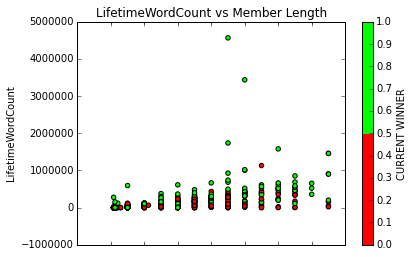

In [19]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
writers.plot(kind='scatter', x='Member Length', y='LifetimeWordCount', c='CURRENT WINNER', colormap = cmap_bold, title = "LifetimeWordCount vs Member Length")

Few writers have a written more than 1,000,000 words (or 20 NaNoWriMo winning novels) over the course of their NaNoWriMo lifetime.  The density of nonwinners for NaNoWriMo 2015 decreases as Member Length increases, and a higher Lifetime Word Count indicates higher likelihood of winning.  It makes sense that the longer one writes (Member Length) and the more words one writes (Lifetime word Count) makes one more likely to reach the NaNoWriMo writing goal.

__Expected Avg Submission vs Expected Daily Average__

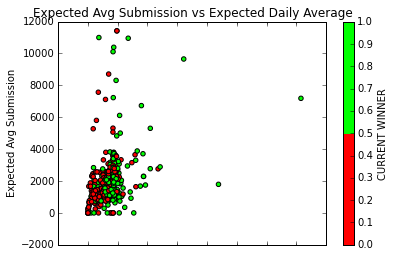

In [6]:
df = writers[writers['Expected Avg Submission'] <= 15000]
df.plot(kind='scatter', x='Expected Daily Average', y='Expected Avg Submission', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Avg Submission vs Expected Daily Average")

It almost looks like there are clusters.  If Expected Daily Average => Expected Avg Submission, a writer is more likely to win.  It's worth noting that the minimum daily average needed to win a NaNoWriMo contest is about 1,666 (50,000 words / 30 days).

__Number of Wins vs Number of times participated__

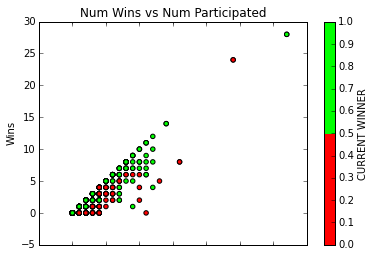

In [22]:
df = writers[writers['Wins'] <= 30]
df.plot(kind='scatter', x='Participated', y='Wins', c='CURRENT WINNER', colormap=cmap_bold, title = "Num Wins vs Num Participated")


It looks like there may be possible clusters here as well.  Writers who have already had more than 5 wins are very likely to win again.  Also writers who have participated more than 5-10 times have better chances of winning as well.

__Expected Daily Average vs Expected Num Submissions__

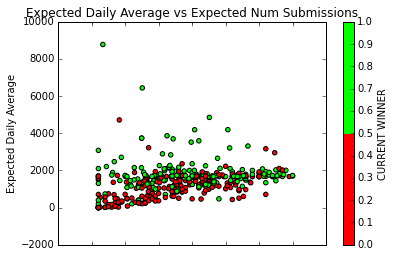

In [8]:
df = writers[writers['Expected Daily Average'] <= 10000]
df.plot(kind='scatter', x='Expected Num Submissions', y='Expected Daily Average', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Daily Average vs Expected Num Submissions")


Many writers seem to cluster around an Expected Daily Average of 1500-2000.  Remember, 1,666 is the minimum daily average to win a NaNoWriMo contest.  Of course, the higher an Expected Daily Average, the more likely a writer is to win the upcoming contest.  Also interesting is how the density of nonwinners decreases as Expected Num Submissions increases, so higher Expected Num Submissions may also be indicative of winning.   

## Distribution Word Count Submissions in early weeks of a contest
I wanted to look retrospectively at the latest NaNoWriMo contest and see how winners can be predicted as early as the first week or two weeks of a contest

__Distribution of num submissions in the first week of the NaNoWriMo 2015 contest, colored by eventual wins and losses for the contest __

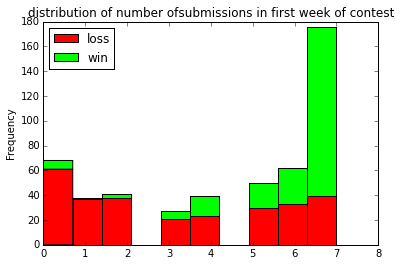

In [20]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['FW Sub'].get_group(0), 'win': winlose['FW Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of number ofsubmissions in first week of contest",colormap=cmap_bold)

__Distribution of num submissions in the first half (first two weeks) of the NaNoWriMo 2015 contest, colored by eventual wins and losses for the contest __

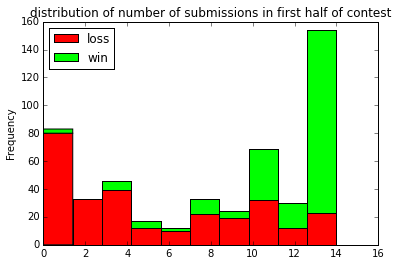

In [10]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['FH Sub'].get_group(0), 'win': winlose['FH Sub'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "distribution of number of submissions in first half of contest",colormap=cmap_bold)

As expected, writers who submit more often in the early weeks are more likely to win.

__Comparing Expected Daily Average and First Week Daily Avg __

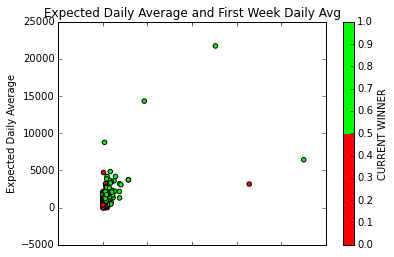

In [14]:
df = writers
df['FW Avg'] = df['FW Total'] / 7
df.plot(kind='scatter', x='FW Avg', y='Expected Daily Average', c='CURRENT WINNER', colormap=cmap_bold, title = "Expected Daily Average and First Week Daily Avg")

Additionally, writers whose daily average in the first week => than the Expected Daily Average of their past novels are more likely to win.

### Does Municipal Liaison or having a novel sponsored have effect on winning?

In [13]:
# Convert to binary
writers['Primary Role'][writers['Primary Role'] == 'Municipal Liaison'] = 1
writers['Primary Role'][writers['Primary Role'] != 1] = 0
writers['Sponsorship URL'].fillna(0, inplace=True)
writers['Sponsorship URL'][writers['Sponsorship URL'] != 0] = 1

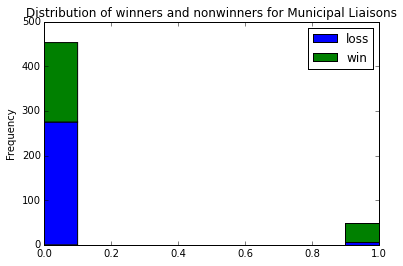

In [14]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Primary Role'].get_group(0), 'win': winlose['Primary Role'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "Distribution of winners and nonwinners for Municipal Liaisons")

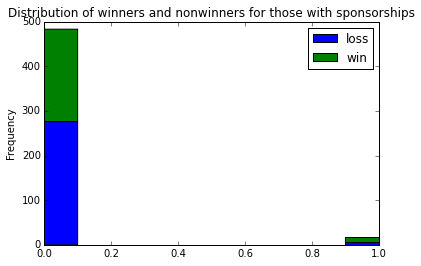

In [15]:
winlose = writers.groupby("CURRENT WINNER")
df = pd.DataFrame({'loss': winlose['Sponsorship URL'].get_group(0), 'win': winlose['Sponsorship URL'].get_group(1)})
df.plot(kind='hist', stacked=True, title = "Distribution of winners and nonwinners for those with sponsorships")

__It definitely seems like one is more likely to win if they are a Municipal Liaison of if their novel is sponsored!__

In [16]:
sponsors = writers[writers['Sponsorship URL'] == 1]
winners = len(sponsors[sponsors['CURRENT WINNER'] == 1])
nonwinners = len(sponsors[sponsors['CURRENT WINNER'] == 0])
print "The ratio of winners to nonwinners for those with Sponsors is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those with Sponsors is 2.0


In [17]:
mls = writers[writers['Primary Role'] == 1]
winners = len(mls[mls['CURRENT WINNER'] == 1])
nonwinners = len(mls[mls['CURRENT WINNER'] == 0])
print "The ratio of winners to nonwinners for those who are MLs is " + str( float(winners) / nonwinners)

The ratio of winners to nonwinners for those who are MLs is 5.85714285714


## Now let's look at the novel data

In [18]:
novels = pd.read_csv("../clean data/novel_data.csv", index_col=0)
novels.head()

,Writer Name,Novel Name,Genre,Final Word Count,Daily Average,Winner,Synopses,url,Novel Date,Excerpt
0,Nicaless,Novel: Lauren's Birthday,Genre: Young Adult,24229,807,0,\n<p></p>\n,http://nanowrimo.org/participants/nicaless/nov...,November 2015,\n<p></p>\n
1,Nicaless,Novel: A Mystery in the Kingdom of Aermon,Genre: Fantasy,50919,"1,697",1,\n<p>Hitoshi is appointed the youngest Judge a...,http://nanowrimo.org/participants/nicaless/nov...,November 2014,"\n<p>This story, funnily enough, started out a..."
2,Rachel B. Moore,Novel: Finding Fortunato,Genre: Literary,50603,"1,686",1,\n<p>Sam and Anna Gold and their newly adoptiv...,http://nanowrimo.org/participants/rachel-b-moo...,November 2015,\n<p></p>\n
3,Rachel B. Moore,Novel: The Residency,Genre: Literary,50425,"1,680",1,\n<p>It's every writer's dream - an all-expens...,http://nanowrimo.org/participants/rachel-b-moo...,November 2014,\n<p></p>\n
4,Rachel B. Moore,Novel: The Jew From Fortunato,Genre: Literary Fiction,41447,"1,381",0,\n<p>20-something Andre Levinsky is a fish out...,http://nanowrimo.org/participants/rachel-b-moo...,November 2013,\n<p></p>\n


### Overall Wins for Losses

In [19]:
winners = len(novels[novels['Winner'] == 1])
nonwinners = len(novels[novels['Winner'] == 0])
print "The total number of novels written is " + str( winners + nonwinners)
print str(winners) + " are winners"
print str(nonwinners) + " are not winners"
print "Therefore " + str( (float(winners) / (nonwinners + winners) ) * 100 ) + "% are winners"
print "The ratio of winners to nonwinners is " + str( float(winners) / nonwinners)


The total number of novels written is 2123
1333 are winners
790 are not winners
Therefore 62.78850683% are winners
The ratio of winners to nonwinners is 1.68734177215


It's interesting that there are more winning novels than nonwinning novels while there are more winning writers for the most recent NaNoWriMo than there are nonwinning writers.  But this makes sense because writers who write more novels are more likely to have their novels reach the 50,000 word goal.

### Text Features

In [21]:
novel_features = pd.read_csv("../clean data/novel_features.csv", index_col = 0)

The average number of words in a synopses is 52.5930287329
There are 729 novels without a synopsis


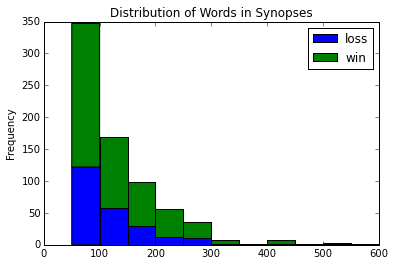

In [51]:
print "The average number of words in a synopses is " + str(novel_features['num words'].mean())
print "There are " + str(novel_features['num words'].value_counts()[0]) + " novels without a synopsis"
winlose = novel_features[novel_features['num words'] >= 50]
winlose = winlose.groupby("Winner")
df = pd.DataFrame({'loss': winlose['num words'].get_group(0), 'win': winlose['num words'].get_group(1)})
df.plot(kind='hist', stacked=True, bins=[50,100,150,200,250,300,350,400,450,500,550,600], title = "Distribution of Words in Synopses")

The average length in words of a synopses is 50 words, or about a few good sentences.  This is likely skewed by the fact that more than a third of the novels don't even have a synopsis.  There are few novels with synopses longer than 100 words, but as synopses get longer, it seems more likely that they belong to a winning novel.

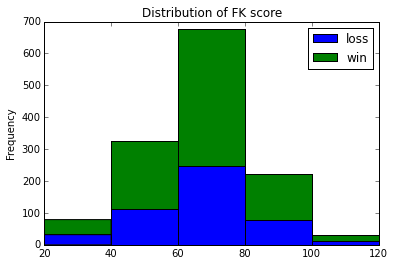

In [52]:
winlose = novel_features.groupby("Winner")
df = pd.DataFrame({'loss': winlose['fk score'].get_group(0), 'win': winlose['fk score'].get_group(1)})
df.plot(kind='hist', stacked=True, bins=[20,40,60,80,100,120], title = "Distribution of FK score")

In [39]:
from scipy.stats import ttest_ind

ttest_ind(winlose['fk score'].get_group(0), winlose['fk score'].get_group(1))

Ttest_indResult(statistic=-1.4376558464994371, pvalue=0.1506792394358735)

The Flesch-Kincaid reading scores look about normally distributed for this sample of novel synopses for both winners and non-winners, and since the pvalue from our t-test is greater than 10%, we cannot reject a null hypothesis that the winning and non-winning novels have equal averages of Flesch-Kincaid scores.  Flesch-Kincaid scores for a novel synopses are unlikely to be indicative of a winning novel.  

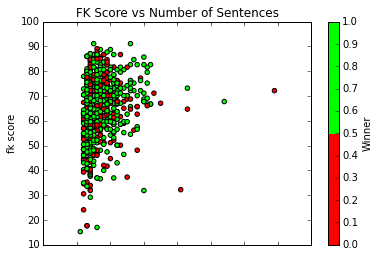

In [53]:
df = novel_features[novel_features['fk score'] >= 0]
df = df[df['num words'] >= 50]
df.plot(kind='scatter', x='num sentences', y='fk score', c='Winner', colormap=cmap_bold, title = "FK Score vs Number of Sentences")

Trying to plot reading score of synopses against length of synopses produces this gobbled mess.  It may be hard trying to predict winning novels with these features...